In [ ]:
# Data Pre-processing Lab Assignment

# **----- Import all libraries here -----**

import pandas as pd
import numpy as np

# Import the dataset into a data frame -----------------------------------
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
duplicates = dataset.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


In [ ]:
dataset = dataset.drop_duplicates()

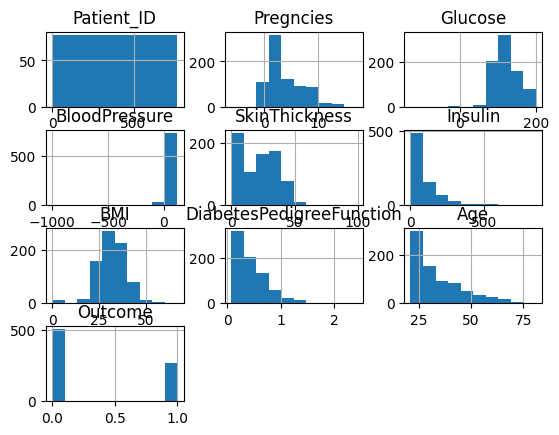

In [ ]:
import matplotlib.pyplot as plt

dataset.hist(bins = 10)
plt.show()

In [ ]:
features = ['Pregncies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for feature in features:
    median = dataset[feature].median()
    dataset[feature].fillna(median, inplace=True)

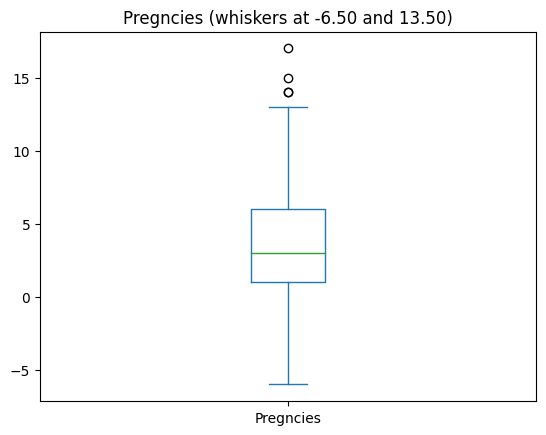

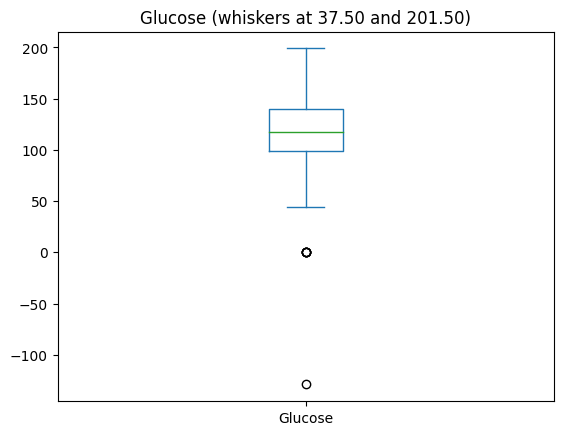

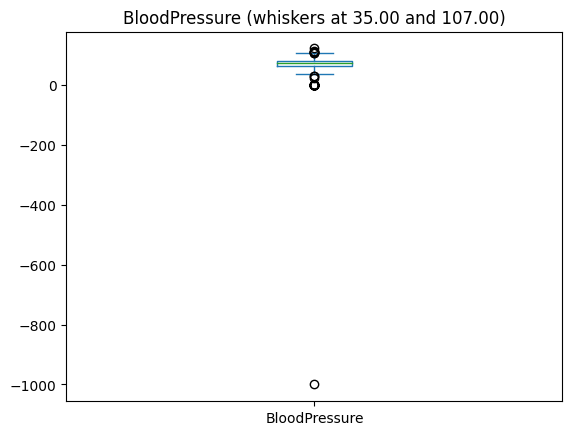

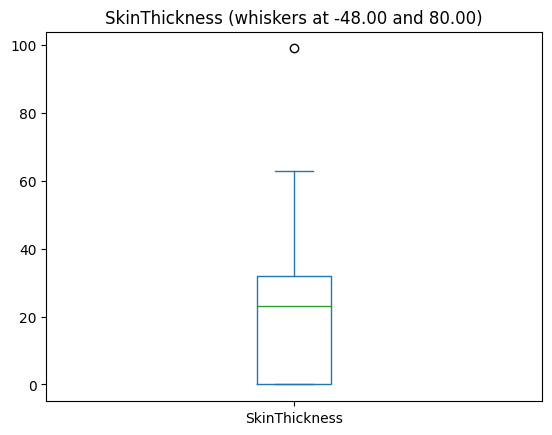

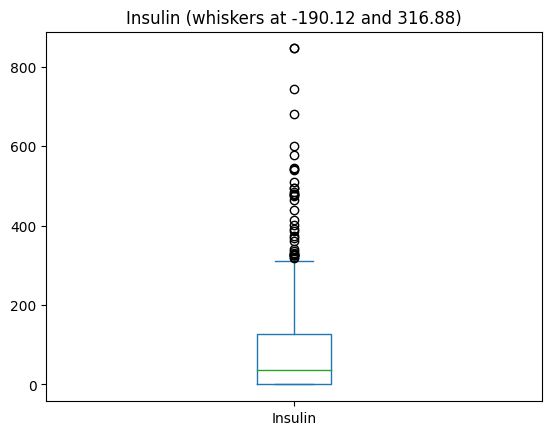

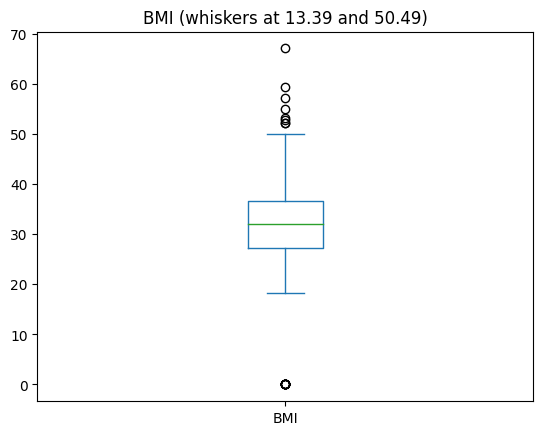

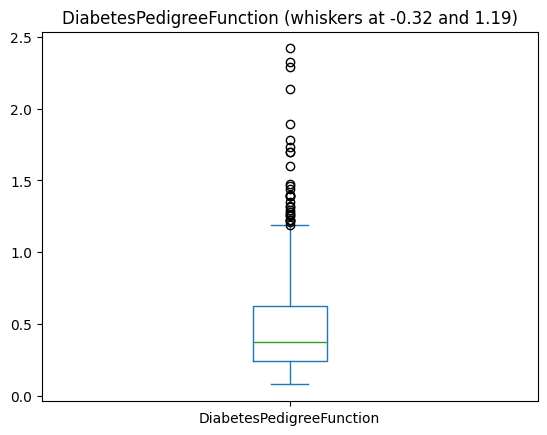

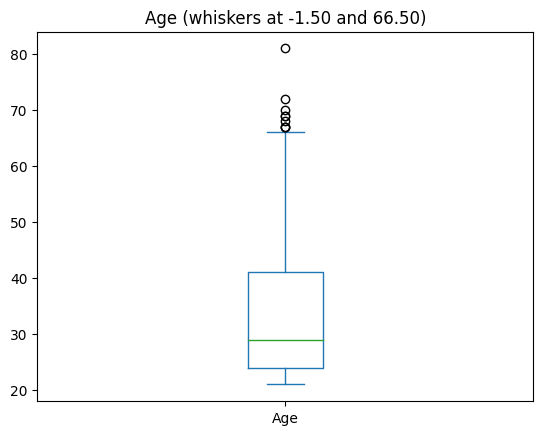

In [ ]:
import matplotlib.pyplot as plt

k = 1.5
for feature in features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dataset[feature].plot.box(showfliers=True, whis=k)
    plt.title(f'{feature} (whiskers at {lower_bound:.2f} and {upper_bound:.2f})')
    plt.show()

In [ ]:
k = 1.5
for feature in features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    median = dataset[feature].median()
    dataset.loc[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound), feature] = median

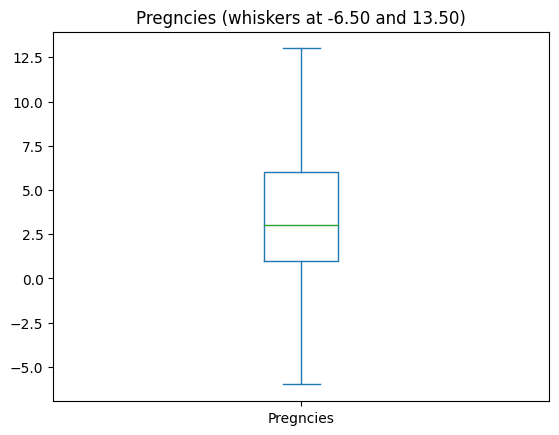

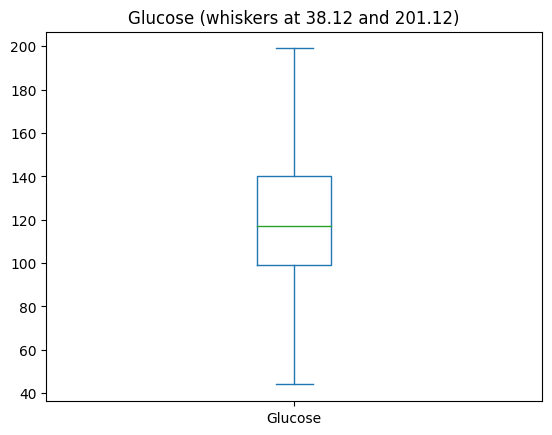

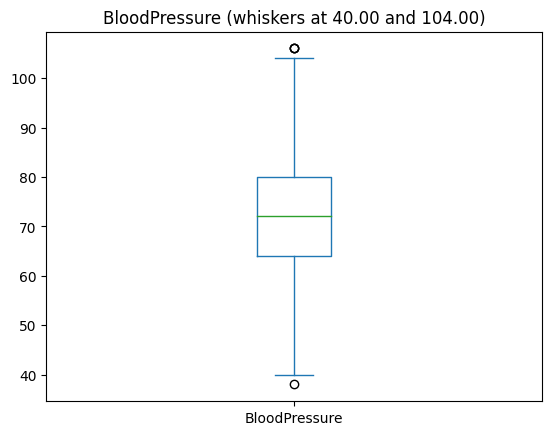

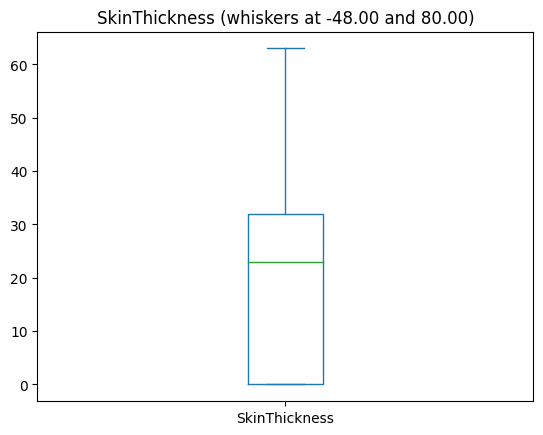

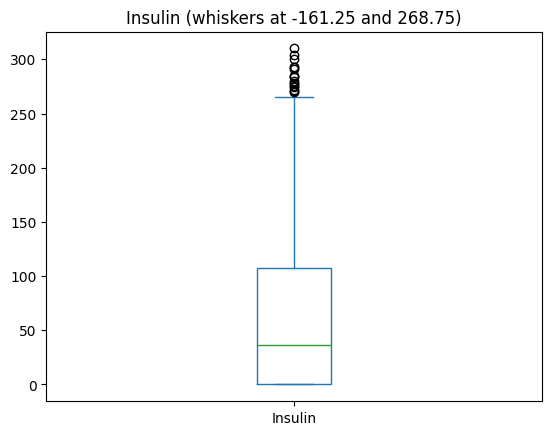

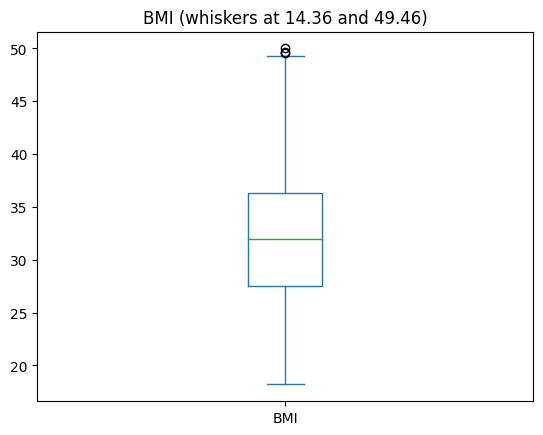

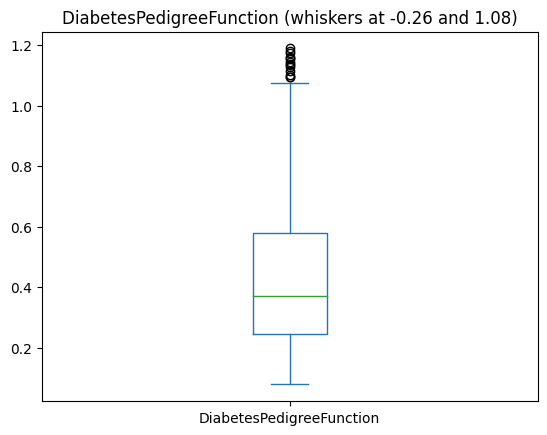

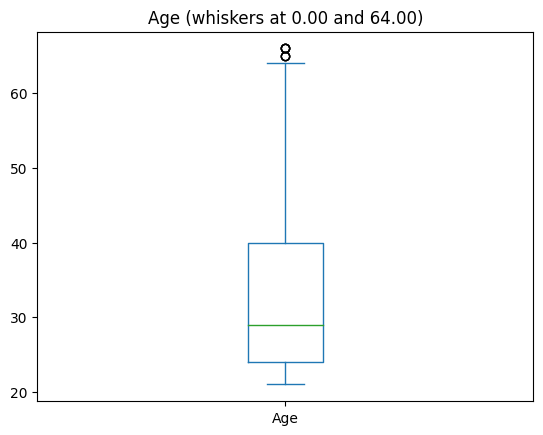

In [ ]:
for feature in features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dataset[feature].plot.box(showfliers=True, whis=k)
    plt.title(f'{feature} (whiskers at {lower_bound:.2f} and {upper_bound:.2f})')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2)

In [ ]:
train_x = train[features]
train_y = train['Outcome']
train_x.head()

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
347,3.0,116.0,72.0,0.0,0.0,23.5,0.187,23.0
284,2.0,108.0,80.0,0.0,0.0,27.0,0.259,52.0
77,5.0,95.0,72.0,33.0,0.0,37.7,0.370,27.0
167,4.0,120.0,68.0,0.0,0.0,29.6,0.709,34.0
257,2.0,114.0,68.0,22.0,0.0,28.7,0.092,25.0


In [ ]:
test_x = test[features]
test_y = test['Outcome']
test_x.head()

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
615,3.0,106.0,72.0,0.0,0.0,25.8,0.207,27.0
706,10.0,115.0,72.0,0.0,0.0,32.0,0.261,30.0
676,9.0,156.0,86.0,0.0,0.0,24.8,0.230,53.0
362,5.0,103.0,72.0,37.0,0.0,39.2,0.305,65.0
612,7.0,168.0,88.0,42.0,36.0,38.2,0.787,40.0


<Axes: >

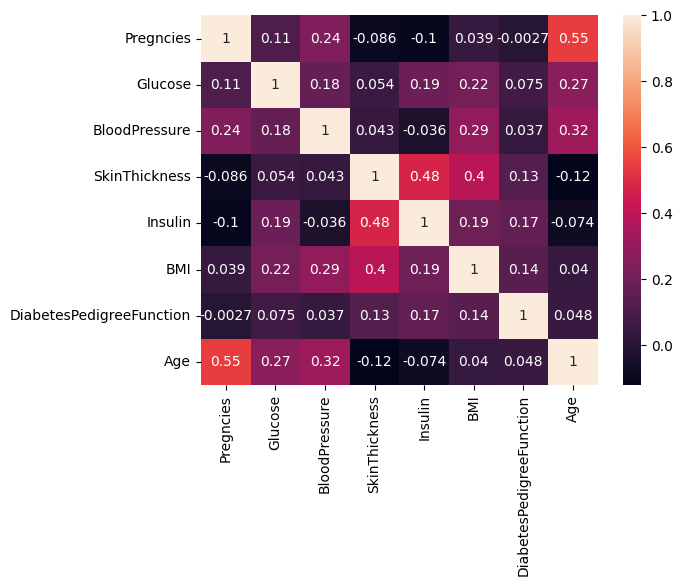

In [ ]:
import seaborn as sns

corr_matrix = train_x.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# # Calculate mutual information between each feature and target variable
# mi_scores = mutual_info_classif(train_x, train_y)
# drop_features = []
# # Print the mutual information score for each feature
# for i, col in enumerate(train_x.columns):
#     print(f"{col}: {round(mi_scores[i],4)}")
#     if mi_scores[i] <= 0.0001:
#       drop_features.append(col)


In [ ]:
# train_x = train_x.drop(drop_features, axis=1)
# train_x.head()

In [ ]:
# test_x = test_x.drop(drop_features, axis=1)
# test_x.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler object
scaler = MinMaxScaler()

# Fit the scaler on train_x
scaler.fit(train_x)

# Transform train_x and test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# Convert train_x to pandas DataFrame
train_x = pd.DataFrame(train_x, columns=range(train_x.shape[1]))

# Convert test_x to pandas DataFrame
test_x = pd.DataFrame(test_x, columns=range(test_x.shape[1]))

train_x.head()


,0,1,2,3,4,5,6,7
0,0.473684,0.464516,0.500000,0.000000,0.0,0.166667,0.098110,0.044444
1,0.421053,0.412903,0.617647,0.000000,0.0,0.276730,0.162916,0.688889
2,0.578947,0.329032,0.500000,0.523810,0.0,0.613208,0.262826,0.133333
3,0.526316,0.490323,0.441176,0.000000,0.0,0.358491,0.567957,0.288889
4,0.421053,0.451613,0.441176,0.349206,0.0,0.330189,0.012601,0.088889


In [ ]:
from sklearn.feature_selection import chi2

# Compute the chi-square values and p-values for each feature
chi2_scores, p_values = chi2(train_x, train_y)

# Create a pandas dataframe to display the results
results_df = pd.DataFrame({'Feature': train_x.columns.values, 'Chi-Square': chi2_scores, 'p-value': p_values})
results_df.sort_values('Chi-Square', ascending=False, inplace=True)

# Print the results
print(results_df)


   Feature  Chi-Square   p-value
1        1   12.718185  0.000362
7        7   10.345877  0.001298
5        5    5.990843  0.014380
6        6    1.596551  0.206393
4        4    1.548451  0.213364
2        2    1.043990  0.306895
0        0    1.003482  0.316470
3        3    0.499215  0.479845


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Set the number of features to be selected
k = 3

# Select the k-best features using chi2
selector = SelectKBest(chi2, k=k)
train_x_kbest = selector.fit_transform(train_x, train_y)
test_x_kbest = selector.transform(test_x)

# Get the names of the selected features
selected_features = train_x.columns[selector.get_support(indices=True)].tolist()

# Convert train_x_kbest to pandas DataFrame with column names
train_x = pd.DataFrame(train_x_kbest, columns=selected_features)

# Convert test_x_kbest to pandas DataFrame with column names
test_x = pd.DataFrame(test_x_kbest, columns=selected_features)


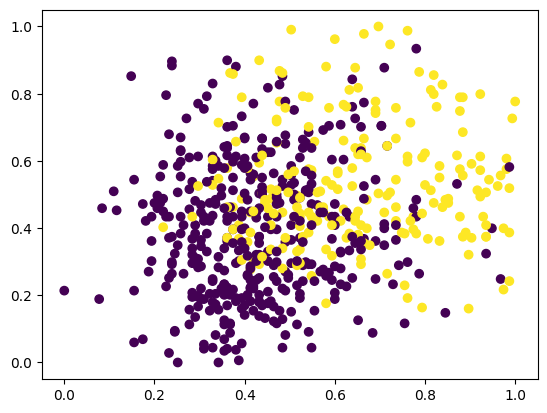

In [ ]:
f = train_x.columns.tolist()
plt.scatter(train_x[f[0]], train_x[f[1]], c=train_y)
plt.show()

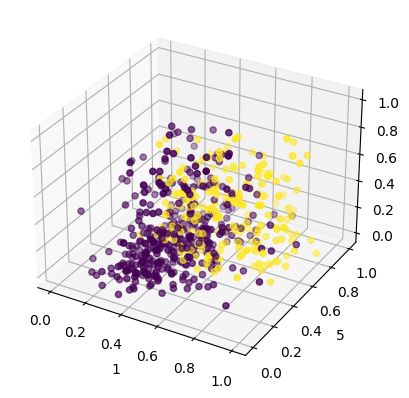

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data points
ax.scatter(train_x[f[0]], train_x[f[1]], train_x[f[2]], c=train_y)

# set the labels for each axis
ax.set_xlabel(f[0])
ax.set_ylabel(f[1])
ax.set_zlabel(f[2])

plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the SVM classifier object
clf = SVC(kernel='poly', degree=4, gamma='scale', coef0=1, C=1)

# Define the parameter grid to search over
param_grid = {'degree': [2, 3, 4, 5], 'C': [0.1, 1, 10, 100], 'coef0': [0, 1, 2]}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Train the classifier on the training data using grid search
grid_search.fit(train_x, train_y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the classifier on the training data using the best parameters
clf = SVC(kernel='poly', **best_params)
clf.fit(train_x, train_y)

# Make predictions on the test data
y_pred = clf.predict(test_x)

# Compute the accuracy of the classifier
acc = accuracy_score(test_y, y_pred)

# Print the best parameters, best score, and accuracy as percentage
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")
print(f"Accuracy: {acc*100:.2f}%")


Best Parameters: {'C': 0.1, 'coef0': 2, 'degree': 2}
Best Score: 0.78
Accuracy: 74.68%
